In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [96]:
Data_PATH = "../input/california-housing-prices"

In [97]:
def load_data(path):
    csv_path = os.path.join(Data_PATH,path)
    return pd.read_csv(csv_path)

In [98]:
housing = load_data("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [99]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [100]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [101]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


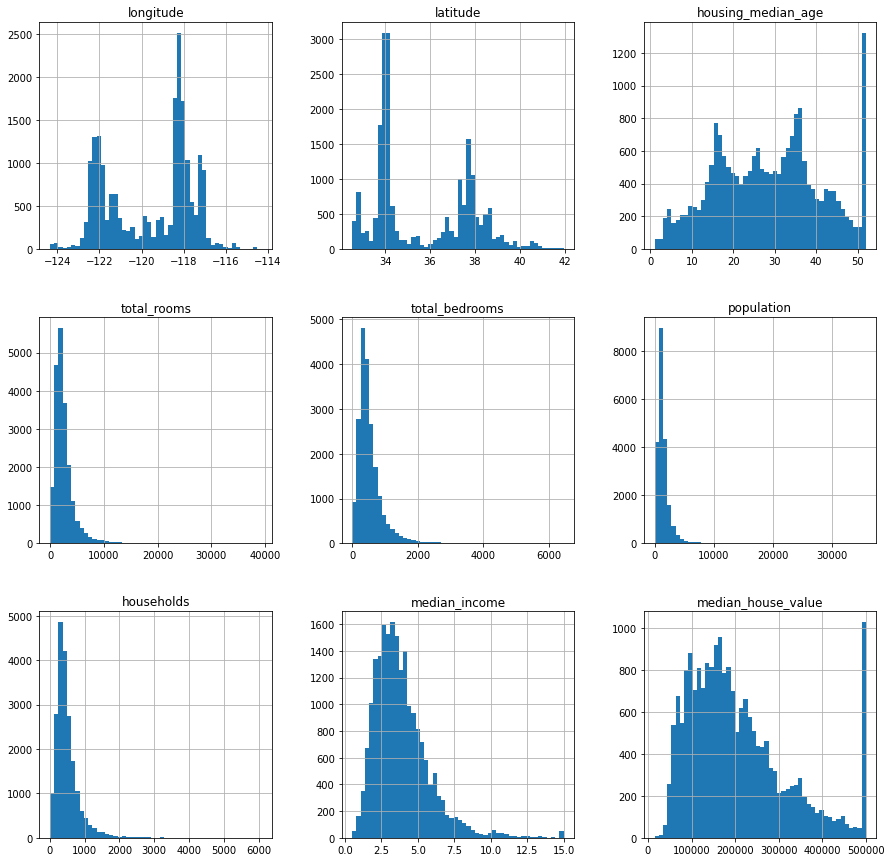

In [102]:
housing.hist(bins=50,figsize=(15,15))
plt.show()

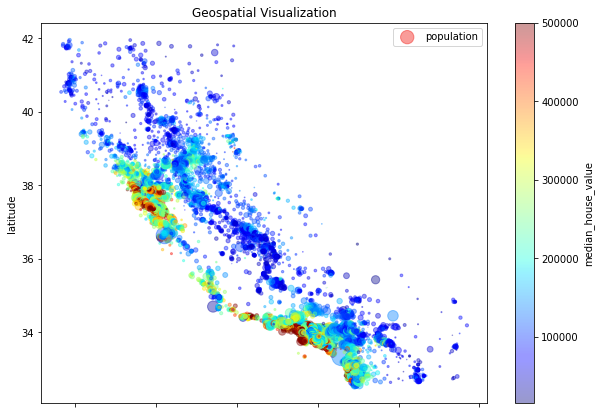

In [103]:
housing.plot(kind="scatter",x="longitude", y = "latitude", alpha = 0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap('jet'),colorbar = True)
plt.title("Geospatial Visualization")
plt.legend()
plt.show()

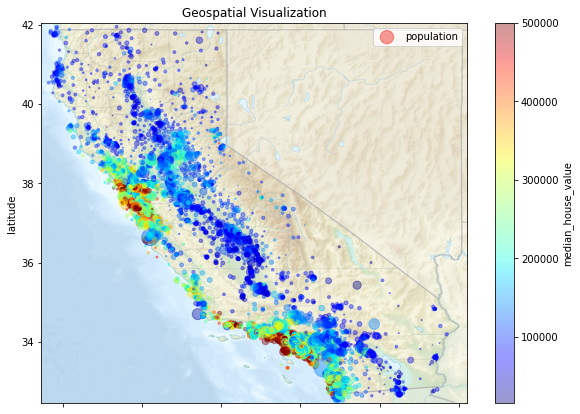

In [104]:
Position_img = cv2.cvtColor(cv2.imread("../input/image/California.png"),cv2.COLOR_BGR2RGB)
housing.plot(kind="scatter",x="longitude", y = "latitude", alpha = 0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap('jet'),colorbar = True)
plt.imshow(Position_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.title("Geospatial Visualization")
plt.legend()
plt.show()

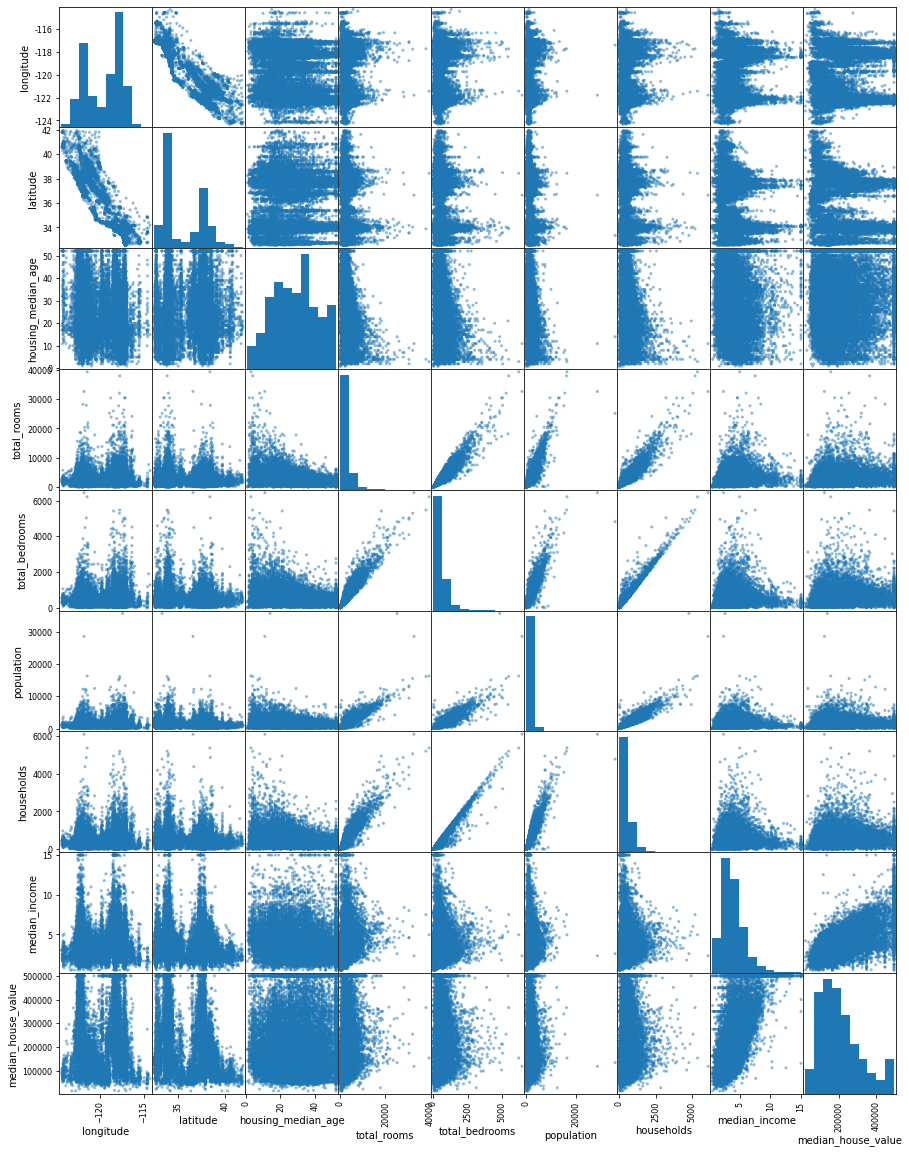

In [105]:
scatter_matrix(housing,figsize=(15,20))
plt.show()

In [106]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


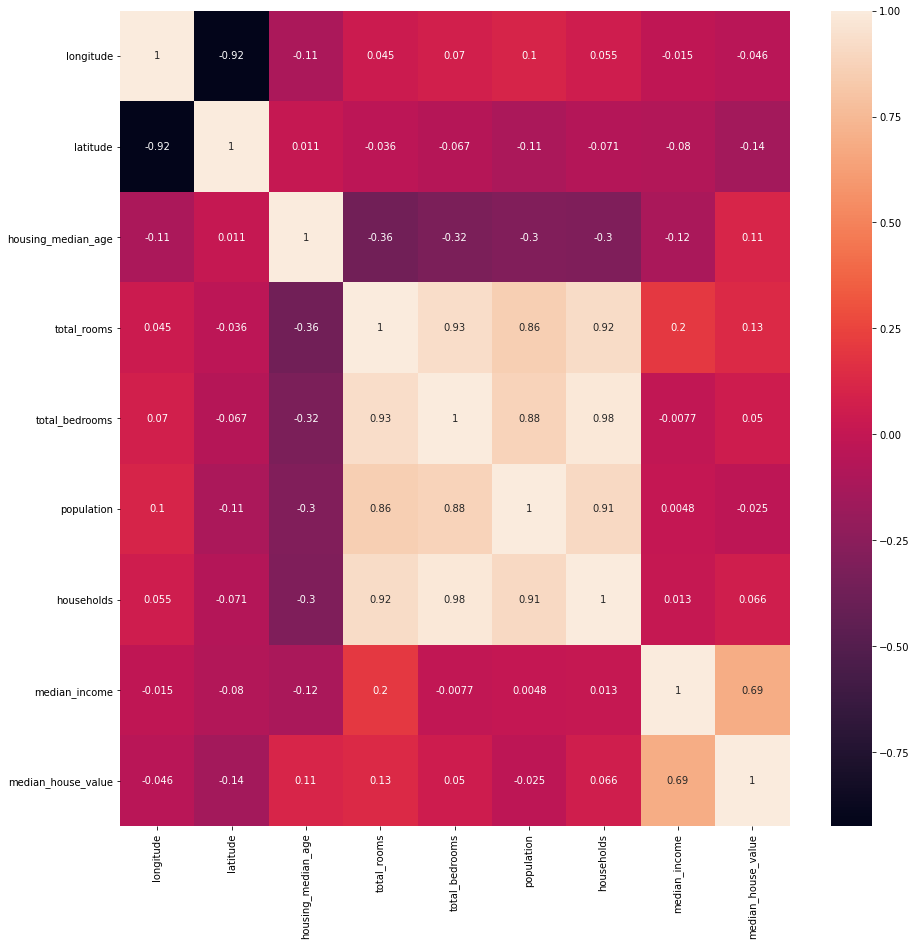

In [107]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [108]:
housing_median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(housing_median,inplace=True)
################### OR Using Sklearn ##############
# imputer = Imputer(np.nan,strategy ="median")
# imputer.fit(housing.iloc[:,4:5])
# housing.iloc[:,4:5] = imputer.transform(housing.iloc[:,4:5])
# housing.isnull().sum()

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


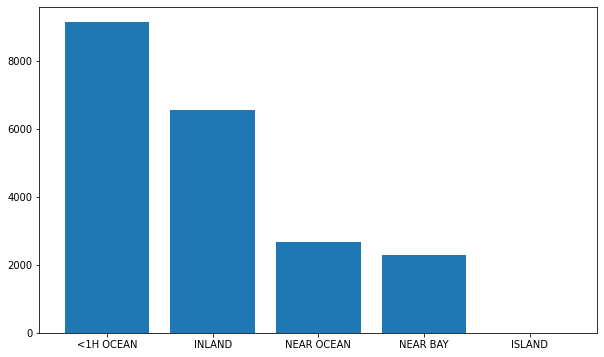

In [125]:
count = housing.ocean_proximity.value_counts()
plt.figure(figsize=(10, 6))
plt.bar(count.index, height = count)
plt.show()

In [110]:
housing_prepared = pd.get_dummies(housing,columns=['ocean_proximity'])
housing_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [111]:
X = housing_prepared.drop("median_house_value",axis=1)
y = housing_prepared["median_house_value"]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [113]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [114]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,y_train)

print(f"Coefficients are: {lin_reg_model.coef_}")
print(f"Intrception is: {lin_reg_model.intercept_}")

Coefficients are: [-5.39908337e+04 -5.46097848e+04  1.38994862e+04 -1.30932062e+04
  4.30699058e+04 -4.33967729e+04  1.83627106e+04  7.51738884e+04
 -5.41273446e+16 -5.06649706e+16 -1.69514943e+15 -3.43892723e+16
 -3.61876915e+16]
Intrception is: 207198.42191001348


In [115]:
y_pred = lin_reg_model.predict(X_test)
print("Predicted Values are:")
print(y_pred[:5])
print("Actual values are: ")
print(y_test[:5])

Predicted Values are:
[ 54044.42191001 124330.42191001 255506.42191001 267992.42191001
 262878.42191001]
Actual values are: 
20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: median_house_value, dtype: float64


In [116]:
y_train_pred = lin_reg_model.predict(X_train)
lin_mse = mean_squared_error(y_train,y_train_pred)
lin_rmse = np.sqrt(lin_mse)
print(f"Train RMSE: {lin_rmse}")

y_test_pred = lin_reg_model.predict(X_test)
lin_mse = mean_squared_error(y_test,y_test_pred)
lin_rmse = np.sqrt(lin_mse)
print(f"Test RMSE: {lin_rmse}")

Train RMSE: 68433.98144305553
Test RMSE: 70060.267084284


In [117]:
print(f"Train Accuracy: {lin_reg_model.score(X_train,y_train)}")
print(f"Test Accuracy: {lin_reg_model.score(X_test,y_test)}")

Train Accuracy: 0.6496644114299658
Test Accuracy: 0.6254267861846973


## Underfitting

## Decision Tree Model

In [118]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)
housing_pred = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train,housing_pred)
tree_rmse = np.sqrt(tree_mse)
print(f"Train RMSE: {tree_rmse}")

Train RMSE: 0.0


In [119]:
print(f"Train Accuracy: {tree_reg.score(X_train,y_train)}")
print(f"Test Accuracy: {tree_reg.score(X_test,y_test)}")

Train Accuracy: 1.0
Test Accuracy: 0.6307767839504476


## Overfitting

## Cross Validation of Decision tree

In [120]:
scores = cross_val_score(tree_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
    
display_scores(tree_rmse_scores)

Scores:  [66722.98307828 69850.00208015 66601.15405474 69766.44528788
 70004.69661869 67824.24322224 62662.11800975 66335.50381524
 69563.30757517 67656.5246984 ]
Mean:  67698.69784405387
Standard deviation:  2170.2001171089382


## Cross Validation of Linear Regression

In [121]:
lin_scores = cross_val_score(lin_reg_model,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores:  [66722.98307828 69850.00208015 66601.15405474 69766.44528788
 70004.69661869 67824.24322224 62662.11800975 66335.50381524
 69563.30757517 67656.5246984 ]
Mean:  67698.69784405387
Standard deviation:  2170.2001171089382


## Random Forest Regressor

In [122]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,y_train)
housing_pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train,housing_pred)
forest_rmse = np.sqrt(forest_mse)
print(f"Train RMSE: {forest_rmse}")

Train RMSE: 18114.286060708062


In [123]:
print(f"Train Accuracy: {forest_reg.score(X_train,y_train)}")
print(f"Test Accuracy: {forest_reg.score(X_test,y_test)}")

Train Accuracy: 0.975453866872207
Test Accuracy: 0.8176373141968777


In [124]:
scores = cross_val_score(forest_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores:  [46498.12004152 50617.72900203 47576.13710166 49785.75032969
 50279.34091574 46784.55421252 45640.21220082 50552.07071078
 49840.60279974 49804.17738184]
Mean:  48737.869469635494
Standard deviation:  1800.8176067048594
